STEP 0: Import Required Core Libraries

In [3]:
# Import numpy for numerical operations like arrays and dot products
import numpy as np

# Import pandas for loading and handling CSV dataset
import pandas as pd

# Import matplotlib for plotting (allowed but optional)
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TO-DO 1: Load, Observe & Understand the Dataset

In [5]:
# Load the dataset and inspect its structure
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI Worksheet/student.csv")

# Display first 5 rows to understand structure
print("Top 5 rows:")
print(data.head())

# Display last 5 rows
print("\nBottom 5 rows:")
print(data.tail())

# Display dataset information (columns, datatype, null values)
print("\nDataset Information:")
print(data.info())

# Display statistical summary (mean, std, min, max)
print("\nDescriptive Statistics:")
print(data.describe())


Top 5 rows:
   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62

Bottom 5 rows:
     Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB
None

Descriptive Statistics:
              Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000    60.750000    58.000000
50

Separate Features and Target

In [6]:
# Separate independent variables (features) and dependent variables (target)

X = data[['Math', 'Reading']].values   # Features (2D)
y = data['Writing'].values             # Target (1D)


TO-DO 2: Weight Initialization

Matrix Representation (NO Bias Term)

In [7]:
# Number of features (Math, Reading)
d = X.shape[1]

# Initialize weight vector with zeros
# No bias term
W = np.zeros(d)


Bias is ignored, so model becomes:
    Y=W^T X

TO-DO 3: Train–Test Split

In [8]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.
    """
    # Set seed for reproducibility
    np.random.seed(random_seed)

    # Create index array
    indices = np.arange(X.shape[0])

    # Shuffle indices randomly
    np.random.shuffle(indices)

    # Determine test set size
    test_split_size = int(len(X) * test_size)

    # Split indices
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    # Create train and test sets
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test
# Apply train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Verify shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (700, 2)
X_test shape: (300, 2)
y_train shape: (700,)
y_test shape: (300,)


TO-DO 4: Cost Function (Mean Squared Error)

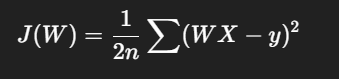

In [9]:
def cost_function(X, y, W):
    """
    Computes Mean Squared Error cost.
    """
    # Predicted values
    y_pred = np.dot(X, W)

    # Number of samples
    n = len(y)

    # Compute MSE cost
    cost = (1 / (2 * n)) * np.sum((y_pred - y) ** 2)

    return cost


TO-DO 5: Cost Function Test Case

In [10]:
# Test case in worksheet
X_test_case = np.array([[1, 2], [3, 4], [5, 6]])
y_test_case = np.array([3, 7, 11])
W_test_case = np.array([1, 1])

cost = cost_function(X_test_case, y_test_case, W_test_case)

if cost == 0:
    print("Proceed Further")
else:
    print("Something went wrong")

print("Cost:", cost)


Proceed Further
Cost: 0.0


TO-DO 6: Gradient Descent Implementation

In [11]:
def gradient_descent(X, y, W, alpha, iterations):
    """
    Performs gradient descent optimization.
    """
    # Store cost history
    cost_history = []

    # Number of samples
    m = len(y)

    # Gradient descent loop
    for i in range(iterations):
        # Step 1: Prediction
        y_pred = np.dot(X, W)

        # Step 2: Error
        loss = y_pred - y

        # Step 3: Gradient calculation
        dW = (1 / m) * np.dot(X.T, loss)

        # Step 4: Update weights
        W = W - alpha * dW

        # Step 5: Store cost
        cost = cost_function(X, y, W)
        cost_history.append(cost)

    return W, cost_history


TO-DO 7: Gradient Descent Test Case

In [12]:
np.random.seed(0)

X_rand = np.random.rand(100, 3)
y_rand = np.random.rand(100)
W_rand = np.random.rand(3)

alpha = 0.01
iterations = 1000

W_final, cost_hist = gradient_descent(X_rand, y_rand, W_rand, alpha, iterations)

print("Final Parameters:", W_final)
print("Last 5 Cost Values:", cost_hist[-5:])


Final Parameters: [0.20551667 0.54295081 0.10388027]
Last 5 Cost Values: [np.float64(0.05436764093665037), np.float64(0.054364452919908414), np.float64(0.05436127052403898), np.float64(0.05435809373901896), np.float64(0.05435492255484332)]


TO-DO 8: RMSE Evaluation Metric

In [13]:
def rmse(y, y_pred):
    """
    Computes Root Mean Square Error.
    """
    return np.sqrt(np.mean((y - y_pred) ** 2))


TO-DO 9: R^2 Score Implementation

In [14]:
def r2(y, y_pred):
    """
    Computes R-Squared score.
    """
    mean_y = np.mean(y)
    ss_total = np.sum((y - mean_y) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)

    return 1 - (ss_residual / ss_total)


TO-DO 10: Main Function

In [15]:
def main():
    # Load dataset
    data =pd.read_csv("/content/drive/My Drive/Colab Notebooks/AI Worksheet/student.csv")

    # Feature and target selection
    X = data[['Math', 'Reading']].values
    y = data['Writing'].values

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

    # Initialize weights
    W = np.zeros(X_train.shape[1])

    # Hyperparameters
    alpha = 0.00001
    iterations = 1000

    # Train model
    W_optimal, cost_history = gradient_descent(X_train, y_train, W, alpha, iterations)

    # Predictions
    y_pred = np.dot(X_test, W_optimal)\

    # Evaluation
    print("\nFinal Weights:", W_optimal)
    print("Cost History (First 10 iterations):", cost_history[:10])
    print("RMSE:", rmse(y_test, y_pred))
    print("R² Score:", r2(y_test, y_pred))






In [16]:
# Execute Main
if __name__ == "__main__":
    main()



Final Weights: [0.34973248 0.64484523]
Cost History (First 10 iterations): [np.float64(2011.9142554734751), np.float64(1639.7141350925594), np.float64(1336.9574813537567), np.float64(1090.6876393991408), np.float64(890.3653872086314), np.float64(727.4178946799876), np.float64(594.8718372335268), np.float64(487.0549625191081), np.float64(399.3533383502967), np.float64(328.0138929475417)]
RMSE: 5.224589785890595
R² Score: 0.8868710151151797


To - Do - 11 - Present your finding

1. Did your Model Overfitt, Underfitts, or performance is acceptable?

Ans:
The model neither overfits nor underfits. Since linear regression is a simple model and both RMSE and R² values are reasonable, the model performance is acceptable.


2.Experiment with different value of learning rate, making it higher and lower, observe the result.
Ans:
a.High learning rate → divergence

b.Very small learning rate → slow convergence

c.Moderate learning rate → stable training

A balanced learning rate ensures stable and optimal convergence.


